# Problema 9.11

<style type="text/css">
       ol { list-style-type: lower-alpha; }
</style>
    

La curva de reacción de un proceso de uns sitema de control de temperatura proporciona los siguientes valores: $K = 10$, $\tau = 2$ min y $t_d = 0.1$ min. Responder:

1. Realizar la sintonía mediante la técnica de Ziegler-Nichols.

2. Comparar la sintonía anterior con la obtenida con la técnica de Cohen-Coon.

3. Asumir que los valores obtenidos con el método de la curva de reacción del proceso no son muy fiables. Calcular qué procentajes de error de los valores $K$, $\tau$ y $t_d$ puede tolerar la sintonía de Ziegler-Nichols sin volverse inestable.


---

**Solución**

a) Para obtener la curva de reacción de un proceso, hay que abrir el lazo de control (desconectando el controlador). A continuación hay que introducir un cambio en escalón en el elemento final de control. Para ello se puede utilizar un generador de funciones que simule al controlador, de manera que la variable $c$ tenga una forma de escalón. Si se trata de una válvula puede ser algo tan sencillo como abrir o cerrar la válvula con rapidez. Evidentemente el cambio generado debe ser conocido, por ejemplo, en el caso de la válvula se debe conocer el recorrido del émbolo. Como consecuencia en el registrador a la salida del proceso se obtiene la curva de respuesta del proceso, tal como muestra la figura siguiente:

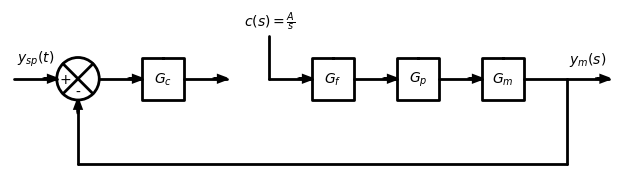

In [1]:
using PyCall, LaTeXStrings

schemdraw = pyimport("schemdraw")
dsp = pyimport("schemdraw.dsp")

d = schemdraw.Drawing(unit=1, fontsize=10)

d.add(dsp.Arrow().right().label(L"y_{sp}(t)"))
comp = d.add(dsp.Mixer(S="-", W="+").anchor("W"))
d.add(dsp.Arrow().right().at(comp.E))
control = d.add(dsp.Box(h=1, w=1).label(L"G_c").anchor("W"))
d.add(dsp.Arrow().right().at(control.E))

fantasma = d.add(dsp.Box(h=1, w=1).anchor("W").linewidth(0))

d.push()
d.add(dsp.Line().up().label(L"c(s)=\frac{A}{s}", "right").at(fantasma.E))
d.add(dsp.Arrow().right().at(fantasma.E))
efc = d.add(dsp.Box(h=1, w=1).label(L"G_f").anchor("W"))
d.add(dsp.Arrow().right().at(efc.E))
proc = d.add(dsp.Box(h=1, w=1).label(L"G_p").anchor("W"))
d.add(dsp.Arrow().right().at(proc.E))
sensor = d.add(dsp.Box(h=1, w=1).label(L"G_m").anchor("W"))
d.add(dsp.Line().right().at(sensor.E))
dot = d.add(dsp.Dot(radius=0))
d.push()
d.add(dsp.Arrow().right().label(L"y_m(s)").at(dot.center))
d.pop()
d.add(dsp.Line().down().length(2).at(dot.center))
d.add(dsp.Line().left().tox(comp.S))
d.add(dsp.Arrow().up().to(comp.S))

d.draw(show=false)

A partir del análisis de la curva obtenida, siguiendo el método propuesto por Cohen y Coon, se obtiene la función de transferencia de la curva de respuesta del proceso, que engloba la dinámica del elemento final de control, proceso y medidor:

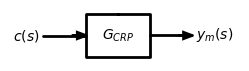

In [2]:
d = schemdraw.Drawing(unit=1, fontsize=10)

d.add(dsp.Arrow().right().label(L"c(s)", "left"))
crp = d.add(dsp.Box(h=1, w=1.5).label(L"G_{CRP}").anchor("W"))
d.add(dsp.Arrow().right().at(crp.E).label(L"y_m(s)", "right"))

d.draw(show=false)

Los parámetros indicados en el enunciado del problema se han obtenido de esta manera.

Por tanto, el lazo de control se puede representar según el siguiente
bucle:

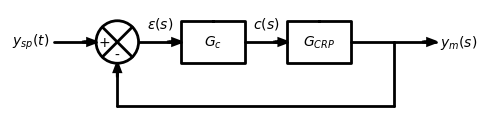

In [3]:
d = schemdraw.Drawing(unit=1, fontsize=10)

d.add(dsp.Arrow().right().label(L"y_{sp}(t)", "left"))
comp = d.add(dsp.Mixer(W="+", S="-").anchor("W"))
d.add(dsp.Arrow().right().at(comp.E).label(L"\epsilon(s)"))
control = d.add(dsp.Box(h=1, w=1.5).anchor("W").label(L"G_c"))
d.add(dsp.Arrow().right().label(L"c(s)").at(control.E))
crp = d.add(dsp.Box(h=1, w=1.5).label(L"G_{CRP}").anchor("W"))
d.add(dsp.Line().right().at(crp.E))
dot = d.add(dsp.Dot(radius=0))
d.push()
d.add(dsp.Arrow().right().label(L"y_m(s)", "right").at(dot.center))
d.pop()
d.add(dsp.Line().down().length(1.5).at(dot.center))
d.add(dsp.Line().left().tox(comp.S))
d.add(dsp.Arrow().up().to(comp.S))

d.draw(show=false)

Para realizar la sintonía del controlador utilizando la técnica de Zielger-Nichols hay que sustituir el controlador existente por unvcontrolador proporcional. A continuación hay que buscar la frecuencia devcruce y la ganancia última del controlador. En este caso la función de transferencia de lazo abierto del bucle de control es:

$$G_{OL} (s) = K_c  \frac{10}{2 s + 1} \mathrm{e}^{- 0.1 s}$$

El diagrama de Bode de este lazo de control es:

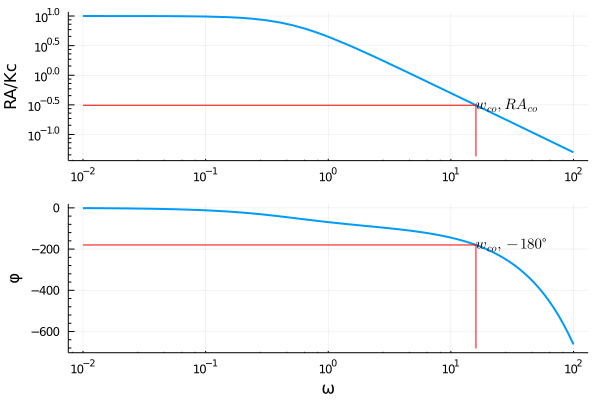

In [10]:
include("../clasecontrol.jl")

sol = bode(10/(2s+1)*exp(-0.1s); wmin=0.01, wmax=100, co=true,
    RAlabel="RA/Kc");

sol.fig

In [5]:
round(sol.wco, sigdigits=4)

16.02

In [6]:
round(sol.RAco, sigdigits=4)

0.3119

La frecuencia de cruce tiene un valor aproximado de 16 rad/min y que $M$ = 0.31, lo que implica que la ganancia última tiene un valor aproximado de 3.2.

Mediante las ecuaciones de la razón de amplitudes y el desfase de la función de transferencia de lazo abierto también se puede resolver el problema:

$$\begin{aligned}
  RA_{OL} &= K_c  \frac{10}{\sqrt{1 + 4 \omega^2}} \\
  \varphi_{OL} &= \mathrm{atan} (- 2 \omega) - 0.1 \omega 
\end{aligned}$$
  
En primer lugar hay que encontrar la frecuencia de cruce resolviendo la siguiente ecuación:

$$- \pi = \mathrm{atan} (- 2 \omega_{co}) - 0.1 \omega_{co}$$

Se obtiene una frecuencia de cruce:

$$\omega_{co} = 16.02 \text{ rad/min}$$

Utilizando la frecuencia de cruece se calcula el periodo último (de oscilaciones sostenidas):

$$P_u = \frac{2 \pi}{\omega_{co}} = 0.392 \text{ min}$$

La ganacia última, aquella que marca el límite de estabilidad ($RA = 1$), se obtendrá resolviendo la ecuación:

$$1 = K_u  \frac{10}{\sqrt{1 + 4 \omega_{co}^2}}$$

La ganacia última es:

$$K_u = 3.206$$

Al no indicar el problema el tipo de controlador a sintonizar, se supondrá que se trata de un PID. Según los valores recomendados por Ziegler y Nichols la sintonía del controlador será:

$$\begin{aligned}
  K_c &= \frac{K_u}{1.7} = 1.89\\
  \tau_I &= \frac{P_u}{2} = 0.196 \text{ min}\\
  \tau_D &= \frac{P_u}{8} = 0.049 \text{ min}
\end{aligned}$$ 
  
b) El cálculo de la sintonía utilizando el método de Cohen y Coon es directo ya que la función de transferencia de la curva de reacción del proceso es conocida. La sintonía del controlador PID será:

$$\begin{aligned}
  K_c &= \frac{1}{K}  \frac{\tau}{t_d} \left( \frac{4}{3} + \frac{t_d}{4
  \tau} \right) = 2.69\\
  \tau_I &= t_d  \frac{32 + 6 \frac{t_d}{\tau}}{13 + 8 \frac{t_d}{\tau}} =
  0.241 \text{ min}\\
  \tau_D &= t_d  \frac{4}{11 + 2 \frac{t_d}{\tau}} = 0.036 \text{ min}
\end{aligned}$$
  
Se puede observar que la sintonía propuesta por el método de Ziegler-Nichols tiene una ganancia proporcional menor. Como compensación la acción integral es más intensa, lo que supondrá una respuesta menos amortiguada (más osicilaciones).

c\) En el caso de que los parámetros de la curva de respuesta del proceso no sean muy fiables es necesario realizar un estudio de sensibilidad.

La función de transferencia de lazo abierto en este caso es:

$$G_{OL} = 1.89 \left( 1 + \frac{1}{0.196 s} + 0.049 s \right) 
   \frac{K}{\tau s + 1} \mathrm{e}^{- t_d s}$$ 
   
Por tanto, la razón de amplitudes y el desfase serán:

$$\begin{aligned}
  RA_{OL} &= 1.89 \sqrt{\left( 0.049 \omega - \frac{1}{0.196
  \omega} \right)^2 + 1}  \frac{K}{\sqrt{1 + \tau^2 \omega^2}}\\
  \varphi_{OL} &= \mathrm{atan} \left( 0.049 \omega - \frac{1}{0.196
  \omega} \right) + \mathrm{atan} (- \tau \omega) - t_d \omega 
\end{aligned}$$

El lazo de control será estable si $RA_{OL} \le 1$ para la frecuencia de cruce ($\varphi_{OL} (\omega_{co}) = -\pi$). Como simplificación se va a considerar la influencia de cada uno de los parámetros del proceso por separado.

**Ganancia del proceso**

En este caso:

$$\begin{aligned}
  RA_{OL} &= 1.89 \sqrt{\left( 0.049 \omega - \frac{1}{0.196
  \omega} \right)^2 + 1}  \frac{K}{\sqrt{1 + 4 \omega^2}}\\
  \varphi_{OL} &= \mathrm{atan} \left( 0.049 \omega - \frac{1}{0.196
  \omega} \right) + \mathrm{atan} (- 2 \omega) - 0.1 \omega
\end{aligned}$$

El diagrama de Bode de este sistema:

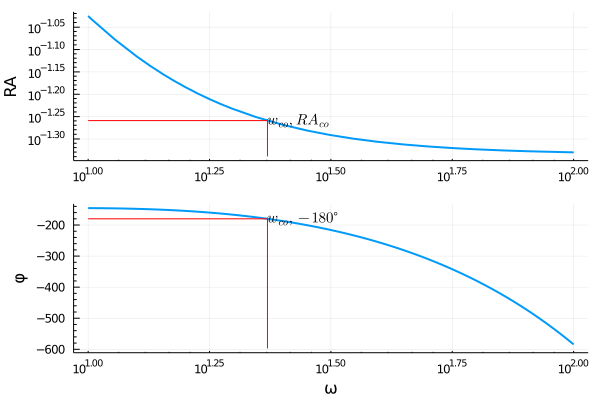

In [7]:
Kc = 1.89
Ti = 0.196
Td = 0.049

sol_K = bode(Kc*(1+1/(Ti*s)+Td*s)*1/(2s+1)*exp(-0.1s);
    wmin=10, wmax=100, co=true);

sol_K.fig

La frecuencia de cruce, $\omega_{co}$, tiene un valor de 23.4 rad. La ganancia del proceso que será el límite de estabilidad ($RA_{OL} (K) = 1$) se obtendrá resolviendo la siguiente ecuación:

$$1 = 1.89 \sqrt{\left( 0.049 \omega_{co} - \frac{1}{0.196
   \omega_{co}} \right)^2 + 1}  \frac{K}{\sqrt{1 + 4
   \omega_{co}^2}}$$
   
Se obtiene un valor de $K$ de 18.1 ($K = \frac{1}{R{co}}$), lo que supone que la ganancia del proceso puede aumentar un 81.5%.

**Constante de tiempo del proceso**

En este caso la razón de amplitudes y el desfase del lazo abierto serán:

$$\begin{aligned}
  RA_{OL} &= 1.89 \sqrt{\left( 0.049 \omega - \frac{1}{0.196
  \omega} \right)^2 + 1}  \frac{10}{\sqrt{1 + \tau^2 \omega^2}}\\
  \varphi_{OL} &= \mathrm{atan} \left( 0.049 \omega - \frac{1}{0.196
  \omega} \right) + \mathrm{atan} (- \tau \omega) - 0.1 \omega
\end{aligned}$$

El límete de estabilidad vendrá determinado por las siguientes ecuaciones:

 $$\begin{aligned}
  1 &= 1.89 \sqrt{\left( 0.049 \omega_{co} - \frac{1}{0.196
  \omega_{co}} \right)^2 + 1}  \frac{10}{\sqrt{1 + \tau^2_u
  \omega_{co}^2}}\\
  -\pi &= \mathrm{atan} \left( 0.049 \omega_{co} - \frac{1}{0.196
  \omega_{co}} \right) + \mathrm{atan} (- \tau_u \omega_{co}) -
  0.1 \omega_{co}
\end{aligned}$$

donde $\omega_{co}$ es la frecuencia de cruce y $\tau_u$ es la constante de tiempo límite de estabilidad, ya que se calcula para una razón de amplitudes igual a la unidad para la frecuencia de cruce.

Se pueden resolver estas ecuaciones numéricamente utilizando la biblioteca `NLsolve.jl`:

In [8]:
# import Pkg; Pkg.add("NLsolve")
using NLsolve

function f!(F, x)
    wco = x[1]
    Tu = x[2]
    F[1] = Kc*sqrt((Td*wco-1/Ti/wco)^2+1)*10/sqrt(1+Tu^2*wco^2)-1
    F[2] = atan(Td*wco-1/Ti/wco)+atan(-Tu*wco)-0.1*wco+pi
end

nlsolve(f!, [20.0, 1.0], autodiff=:forward)

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [20.0, 1.0]
 * Zero: [23.6561256979143, 1.0975994533724522]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

Se obtiene un valor de la frecuencia de cruce de 23.66 rad y una ganancia del proceso última de 1.10.

Una alternativa consiste en buscar la constante de tiempo última del proceso por tanteo, ya sea utilizando los diagramas de Bode o directamente las ecuaciones. Por ejemplo, para una constante de tiempo de 1.1 min se obtiene el siguiente diagrama de Bode:

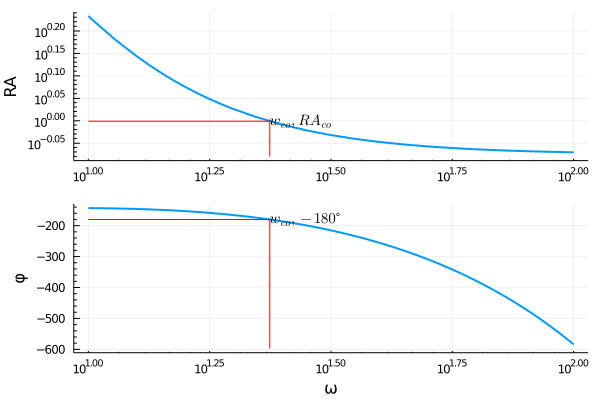

In [9]:
sol_T = bode(Kc*(1+1/(Ti*s)+Td*s)*10/(1.1s+1)*exp(-0.1s);
    wmin=10, wmax=100, co=true);

sol_T.fig

Se puede apreción que el lazo de control está al límite de estabilidad. Por tanto se puede disminuir la constante de tiempo del proceso hasta un 45% (aproximadamente) manteniendo el sistema estable.

**Retraso**

La situación es análoga a las anteriores:

$$\begin{aligned}
  RA_{OL} &= 1.89 \sqrt{\left( 0.049 \omega - \frac{1}{0.196
  \omega} \right)^2 + 1}  \frac{10}{\sqrt{1 + 4 \omega^2}}\\
  \varphi_{OL} &= \mathrm{atan} \left( 0.049 \omega - \frac{1}{0.196
  \omega} \right) + \mathrm{atan} (- 2 \omega) - t_d \omega
\end{aligned}$$

El valor límite del retraso $t_{du}$ se puede calcular utilizando las siguientes ecuaciones:

$$\begin{aligned}
  1 &= 1.89 \sqrt{\left( 0.049 \omega_{co} - \frac{1}{0.196
  \omega_{co}} \right)^2 + 1}  \frac{10}{\sqrt{1 + 4
  \omega_{co}^2}}\\
  -\pi &= \mathrm{atan} \left( 0.049 \omega_{co} - \frac{1}{0.196
  \omega_{co}} \right) + \mathrm{atan} (- 2 \omega_{co}) -
  t_{du} \omega_{co}
\end{aligned}$$

Resolviendo la primera de las ecuaciones se encuentra la frecuencia de cruce:

$$\left\{\begin{array}{l}
     \omega_{co} = \pm \frac{500 \sqrt{20 \sqrt{727254571} +
     248647}}{\sqrt{2199637153}}\\
     \omega_{co} = \pm \frac{500 \sqrt{20 \sqrt{727254571} - 248647}
     i}{\sqrt{2199637153}}
   \end{array}\right.$$
   
La frecuencia de cruce es un número real y positivo, lo que elimina tres de las soluciones:

$$\omega_{co} = \frac{500 \sqrt{20 \sqrt{727254571} +
   248647}}{\sqrt{2199637153}} = 9.464 \text{ rad/min}$$
   
Sustituyendo en la segunda de las ecuaciones, se obtiene:

$$t_{du} = 0.164 \text{ min}$$

El retraso puede aumentar hasta un 64% y el sistema continuará siendo estable.